<a href="https://colab.research.google.com/github/AngieChong/Research-Paper/blob/main/P2_Prediction_of_Inpatient_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATASETS - Inpatient

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Inpatient_2019-2022_amended.csv to Inpatient_2019-2022_amended.csv
User uploaded file "Inpatient_2019-2022_amended.csv" with length 299409783 bytes


In [ ]:
import pandas as pd
df = pd.read_csv("Inpatient_2019-2022_amended.csv")
df.head(5)

,Corporate,ClaimType,ClaimNo,Date,DischargeDate,MCDays,AmountIncurred,AmountInsured,ExcessPaid,Status,...,PatientGender,MedicalProviders,Diagnosis,DiagnosisGroup,HospCharges,Doctor,ICDCode,ProviderState,IsPanel,IndustryField
0,HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.,Inpatient,HESSCIP09190002,26/6/2019,28/6/2019,2.0,6626.90,5000.00,1626.9,PROCESSED,...,F,ANDORRA WOMEN & CHILDREN HOSPITAL,Outcome of delivery,Factors influencing health status and contact ...,HIGH,KHAMSIAH BINTI MUDA,Z37,SELANGOR,Non-Panel,Manufacturing Factory/Company
1,HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.,Inpatient,HESSCIP10190003,30/6/2019,1/7/2019,1.0,3641.00,3641.00,0.0,PROCESSED,...,F,OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...,Outcome of delivery,Factors influencing health status and contact ...,HIGH,KAMARIA IDRIS,Z37,KUALA LUMPUR,Non-Panel,Manufacturing Factory/Company
2,HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.,Inpatient,HESSCIP10190004,26/6/2019,28/6/2019,2.0,949.00,949.00,0.0,PROCESSED,...,F,ANDORRA WOMEN & CHILDREN HOSPITAL,Other specified conditions of integument speci...,Certain conditions originating in the perinata...,HIGH,KHAMSIAH BINTI MUDA,P83.8,SELANGOR,Non-Panel,Manufacturing Factory/Company
3,MiCare Sdn Bhd (ASO),Inpatient,CIP03190003,6/2/2019,9/2/2019,3.0,719.95,719.95,0.0,PROCESSED,...,M,COLUMBIA ASIA HOSPITAL - KLANG,Abdominal and pelvic pain,"Symptoms, signs and abnormal clinical and labo...",LOW,ROSLIZA GHAZALI,R10,SELANGOR,Non-Panel,Management Services Company
4,CD ADVERTISING SDN BHD (60023249),Inpatient,60023249CIP02190001,31/1/2019,3/2/2019,3.0,14186.90,13941.90,245.0,PROCESSED,...,F,KPJ DAMANSARA SPECIALIST HOSPITAL,UTERINE FIBROIDS,Neoplasms,HIGH,"SUSANNA HUAM SIEW HOON ,JUDE MORGAN",D25,SELANGOR,Panel,Consultancy


In [ ]:
print(df.columns)

Index(['Corporate', 'ClaimType', 'ClaimNo', 'Date', 'DischargeDate', 'MCDays',
       'AmountIncurred', 'AmountInsured', 'ExcessPaid', 'Status',
       'TypeOfClaims', 'TotalVisit', 'IsSurgical', 'IsLTM', 'IsMultipleDiag',
       'BenefitPlan', 'EmployeeID', 'PatientID', 'Relationship', 'PatientDOB',
       'AgeBand', 'PatientGender', 'MedicalProviders', 'Diagnosis',
       'DiagnosisGroup', 'HospCharges', 'Doctor', 'ICDCode', 'ProviderState',
       'IsPanel', 'IndustryField'],
      dtype='object')


In [ ]:
## Categorical Variables
C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)
CategoricalVariables

['Corporate',
 'ClaimType',
 'ClaimNo',
 'Date',
 'DischargeDate',
 'Status',
 'TypeOfClaims',
 'IsSurgical',
 'IsLTM',
 'IsMultipleDiag',
 'BenefitPlan',
 'EmployeeID',
 'PatientID',
 'Relationship',
 'PatientDOB',
 'AgeBand',
 'PatientGender',
 'MedicalProviders',
 'Diagnosis',
 'DiagnosisGroup',
 'HospCharges',
 'Doctor',
 'ICDCode',
 'ProviderState',
 'IsPanel',
 'IndustryField']

In [ ]:
## Numerical Variables
Integer = (df.dtypes == 'int64') 
Float   = (df.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)
NumericVariables

['TotalVisit',
 'Corporate',
 'MCDays',
 'AmountIncurred',
 'AmountInsured',
 'ExcessPaid']

In [ ]:
#2 Possibility - Encode column (Anonymisation)
#Import LabelEncoder from sklearn / DataFrameMapper from sklearn_pandas
from sklearn.preprocessing import LabelEncoder
#!pip install sklearn
from sklearn_pandas import DataFrameMapper

encoders = [(["Corporate"], LabelEncoder())]
mapper = DataFrameMapper(encoders, df_out=True)
label_col = mapper.fit_transform(df.copy())
df = pd.concat([df.drop(columns=["Corporate"]), label_col], axis="columns")
df.head(3)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,ClaimType,ClaimNo,Date,DischargeDate,MCDays,AmountIncurred,AmountInsured,ExcessPaid,Status,TypeOfClaims,...,MedicalProviders,Diagnosis,DiagnosisGroup,HospCharges,Doctor,ICDCode,ProviderState,IsPanel,IndustryField,Corporate
0,Inpatient,HESSCIP09190002,26/6/2019,28/6/2019,2.0,6626.9,5000.0,1626.9,PROCESSED,GHSReim,...,ANDORRA WOMEN & CHILDREN HOSPITAL,Outcome of delivery,Factors influencing health status and contact ...,HIGH,KHAMSIAH BINTI MUDA,Z37,SELANGOR,Non-Panel,Manufacturing Factory/Company,2240
1,Inpatient,HESSCIP10190003,30/6/2019,1/7/2019,1.0,3641.0,3641.0,0.0,PROCESSED,GHSReim,...,OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...,Outcome of delivery,Factors influencing health status and contact ...,HIGH,KAMARIA IDRIS,Z37,KUALA LUMPUR,Non-Panel,Manufacturing Factory/Company,2240
2,Inpatient,HESSCIP10190004,26/6/2019,28/6/2019,2.0,949.0,949.0,0.0,PROCESSED,GHSReim,...,ANDORRA WOMEN & CHILDREN HOSPITAL,Other specified conditions of integument speci...,Certain conditions originating in the perinata...,HIGH,KHAMSIAH BINTI MUDA,P83.8,SELANGOR,Non-Panel,Manufacturing Factory/Company,2240


## DATA CLEANING

### CHECK DUPLICATE DATA

Based on results below show that there have no duplicated data inside the dataset.

In [ ]:
df.duplicated().sum()

0

### CHECK DIRTY DATA

### CHECK NULL VALUES

In [ ]:
df.isnull().sum()

ClaimType               0
ClaimNo                 0
Date                    0
DischargeDate        2865
MCDays               2865
AmountIncurred          0
AmountInsured           0
ExcessPaid              0
Status                  0
TypeOfClaims            0
TotalVisit              0
IsSurgical              0
IsLTM                   0
IsMultipleDiag          0
BenefitPlan            78
EmployeeID              0
PatientID               0
Relationship            0
PatientDOB             55
AgeBand                 0
PatientGender       45704
MedicalProviders       71
Diagnosis           50228
DiagnosisGroup      52436
HospCharges             0
Doctor              66506
ICDCode             50228
ProviderState       62091
IsPanel                 0
IndustryField           0
Corporate               0
dtype: int64

In [ ]:
(df.isnull().sum()/len(df))*100

ClaimType           0.000000
ClaimNo             0.000000
Date                0.000000
DischargeDate       0.351612
MCDays              0.000000
AmountIncurred      0.000000
AmountInsured       0.000000
ExcessPaid          0.000000
Status              0.000000
TypeOfClaims        0.000000
TotalVisit          0.000000
IsSurgical          0.000000
IsLTM               0.000000
IsMultipleDiag      0.000000
BenefitPlan         0.009573
EmployeeID          0.000000
PatientID           0.000000
Relationship        0.000000
PatientDOB          0.006750
AgeBand             0.000000
PatientGender       5.609105
MedicalProviders    0.008714
Diagnosis           6.164321
DiagnosisGroup      6.435302
HospCharges         0.000000
Doctor              8.162068
ICDCode             6.164321
ProviderState       7.620229
IsPanel             0.000000
IndustryField       0.000000
Corporate           0.000000
dtype: float64

In [ ]:
#df.loc[df['MCDays']==0.0,'MCDays']=np.nan
#df.MCDays.isnull().sum()
#df['MCDays'].fillna(value=np.mean(df['MCDays']),inplace=True)

x = df['MCDays'].mean()
df['MCDays'].fillna(x, inplace = True)
df.MCDays.isnull().sum()

0

In [ ]:
y = df['PatientGender'].mean()
df['PatientGender'].fillna(y, inplace = True)
df.PatientGender.isnull().sum()

TypeError: ignored

In [ ]:
Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 1.30748 %


## EXPLORATORY DATA ANALYSIS

### DATA DESCRIPTION

In [ ]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814818 entries, 0 to 814817
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ClaimType         814818 non-null  object        
 1   ClaimNo           814818 non-null  object        
 2   Date              814818 non-null  datetime64[ns]
 3   DischargeDate     811953 non-null  object        
 4   MCDays            811953 non-null  float64       
 5   AmountIncurred    814818 non-null  float64       
 6   AmountInsured     814818 non-null  float64       
 7   ExcessPaid        814818 non-null  float64       
 8   Status            814818 non-null  object        
 9   TypeOfClaims      814818 non-null  object        
 10  TotalVisit        814818 non-null  int64         
 11  IsSurgical        814818 non-null  object        
 12  IsLTM             814818 non-null  object        
 13  IsMultipleDiag    814818 non-null  object        
 14  Bene

In [ ]:
# convert column to datetime pandas
df['Date'] = pd.to_datetime(df['Date'])

# Datetime conversion using astype:
#df['DischargeDate'] = df['DischargeDate'].astype('datetime64[ns]')
print(df.dtypes)

ClaimType                   object
ClaimNo                     object
Date                datetime64[ns]
DischargeDate               object
MCDays                     float64
AmountIncurred             float64
AmountInsured              float64
ExcessPaid                 float64
Status                      object
TypeOfClaims                object
TotalVisit                   int64
IsSurgical                  object
IsLTM                       object
IsMultipleDiag              object
BenefitPlan                 object
EmployeeID                  object
PatientID                   object
Relationship                object
PatientDOB                  object
AgeBand                     object
PatientGender               object
MedicalProviders            object
Diagnosis                   object
DiagnosisGroup              object
HospCharges                 object
Doctor                      object
ICDCode                     object
ProviderState               object
IsPanel             

In [ ]:
#df.shape

print('Number of rows: '+ format(df.shape[0]) +', number of features: '+ format(df.shape[1]))

Number of rows: 814818, number of features: 31


In [ ]:
df.describe()

,MCDays,AmountIncurred,AmountInsured,ExcessPaid,TotalVisit,Corporate
count,811953.000000,8.148180e+05,814818.000000,8.148180e+05,814818.000000,814818.000000
mean,2.079418,3.830049e+03,3610.849656,2.191995e+02,0.505761,3519.218495
std,14.780429,1.049955e+04,6919.003824,7.417467e+03,0.499970,2024.873130
min,-1347.000000,0.000000e+00,0.010000,-1.000000e+04,0.000000,0.000000
25%,1.000000,1.897500e+02,184.450000,0.000000e+00,0.000000,1671.000000
50%,2.000000,5.382500e+02,513.500000,0.000000e+00,1.000000,3778.000000
75%,3.000000,4.810573e+03,4613.600000,5.385000e+01,1.000000,5532.000000
max,1211.000000,6.335290e+06,688245.450000,6.335175e+06,2.000000,6619.000000


In [ ]:
df.describe(include='all').T

<ipython-input-27-0dd56a246831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ClaimType,814818,1,Inpatient,814818,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimNo,814818,814817,G1066878CIP11220001,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,814818,1430,2022-05-23 00:00:00,1232,2019-01-01,2022-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DischargeDate,811953,1596,24/6/2022,1053,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MCDays,811953.0,NaN,NaN,NaN,NaT,NaT,2.079418,14.780429,-1347.0,1.0,2.0,3.0,1211.0
AmountIncurred,814818.0,NaN,NaN,NaN,NaT,NaT,3830.049155,10499.547827,0.0,189.75,538.25,4810.5725,6335290.0
AmountInsured,814818.0,NaN,NaN,NaN,NaT,NaT,3610.849656,6919.003824,0.01,184.45,513.5,4613.6,688245.45
ExcessPaid,814818.0,NaN,NaN,NaN,NaT,NaT,219.199498,7417.466935,-10000.0,0.0,0.0,53.85,6335175.0
Status,814818,7,PROCESSED,661885,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeOfClaims,814818,4,GHSPost,370907,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DATA VISUALIZATION

<AxesSubplot:>

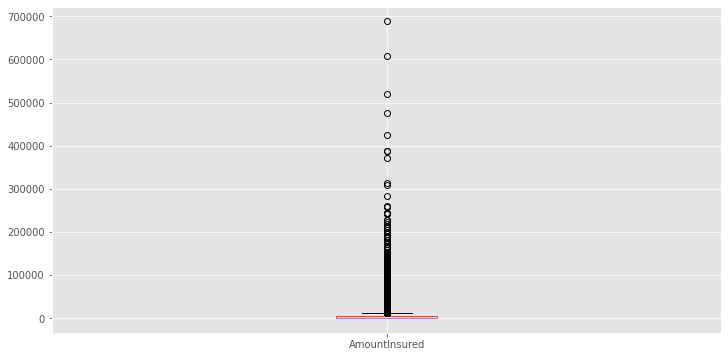

In [ ]:
df[['AmountInsured']].boxplot()

<AxesSubplot:>

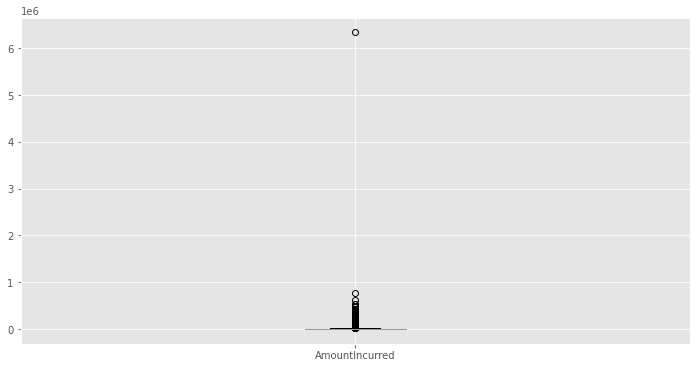

In [ ]:
df[['AmountIncurred']].boxplot()

<AxesSubplot:>

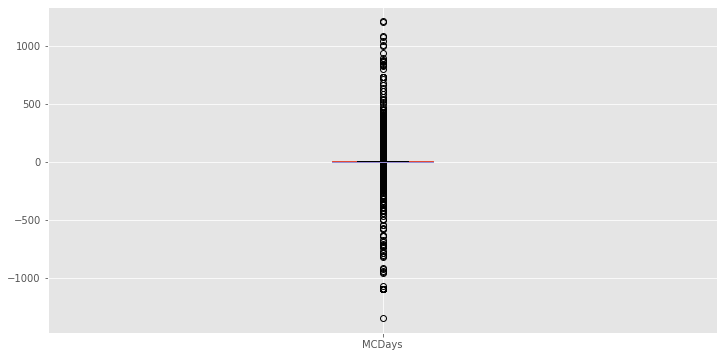

In [ ]:
df[['MCDays']].boxplot()

<AxesSubplot:xlabel='AgeBand', ylabel='AmountInsured'>

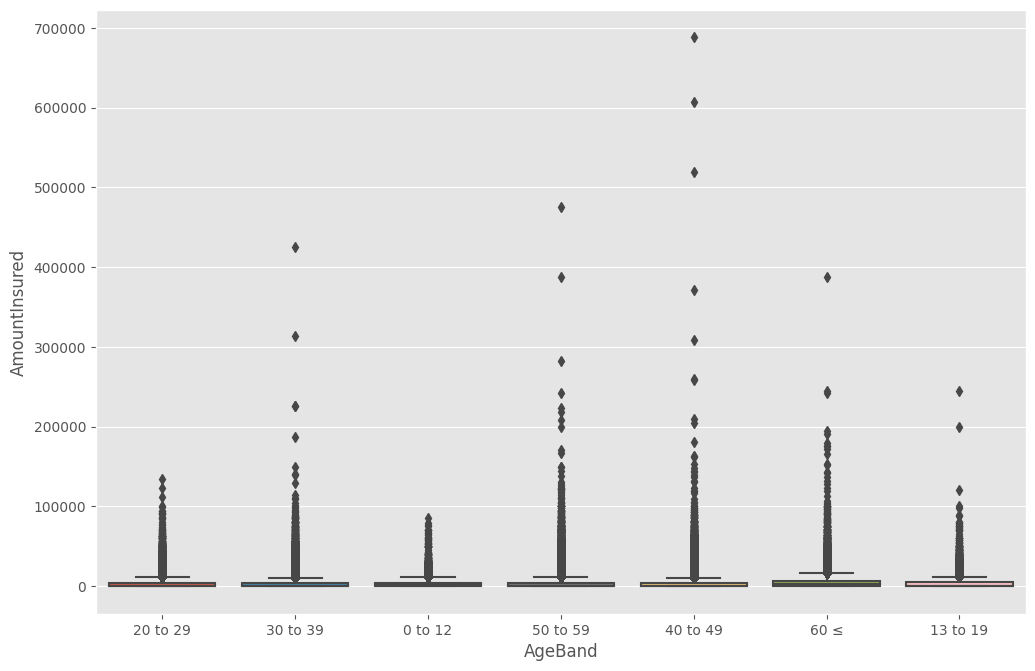

In [ ]:
plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df, x='AgeBand', y='AmountInsured')

In [ ]:
df.groupby(['AgeBand']).mean()['AmountInsured'].sort_values(ascending=True)



AgeBand
0 to 12     2986.171961
30 to 39    3426.257682
20 to 29    3545.818186
40 to 49    3547.656986
13 to 19    3702.329536
50 to 59    3850.456430
60 ≤        5725.241814
Name: AmountInsured, dtype: float64

In [ ]:
df.groupby(['IndustryField']).mean()['AmountInsured'].sort_values(ascending=True)

IndustryField
Design And Install Signages                                916.983333
Consultant -Hr/Human Capital                              1728.965652
Video Game Industry                                       1968.697500
Direct Selling Co/Biz                                     1978.098262
Manufacturing - Disposable Surgical/Medical Equipment     2079.465729
                                                             ...     
Exhibition                                                7950.219412
Printing Of Packaging Boxes                               8223.430000
Construction And Renovation                              11527.788000
Trading & Consultancy                                    12160.220000
Not Available                                            12599.792000
Name: AmountInsured, Length: 175, dtype: float64

<AxesSubplot:xlabel='AgeBand', ylabel='AmountInsured'>

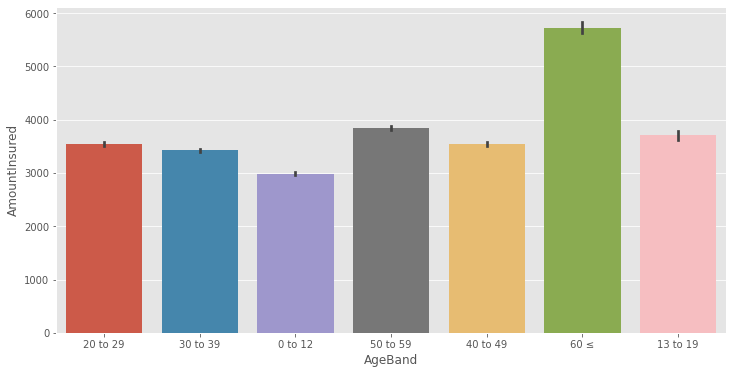

In [ ]:
sns.barplot(data=df, x='AgeBand', y='AmountInsured')

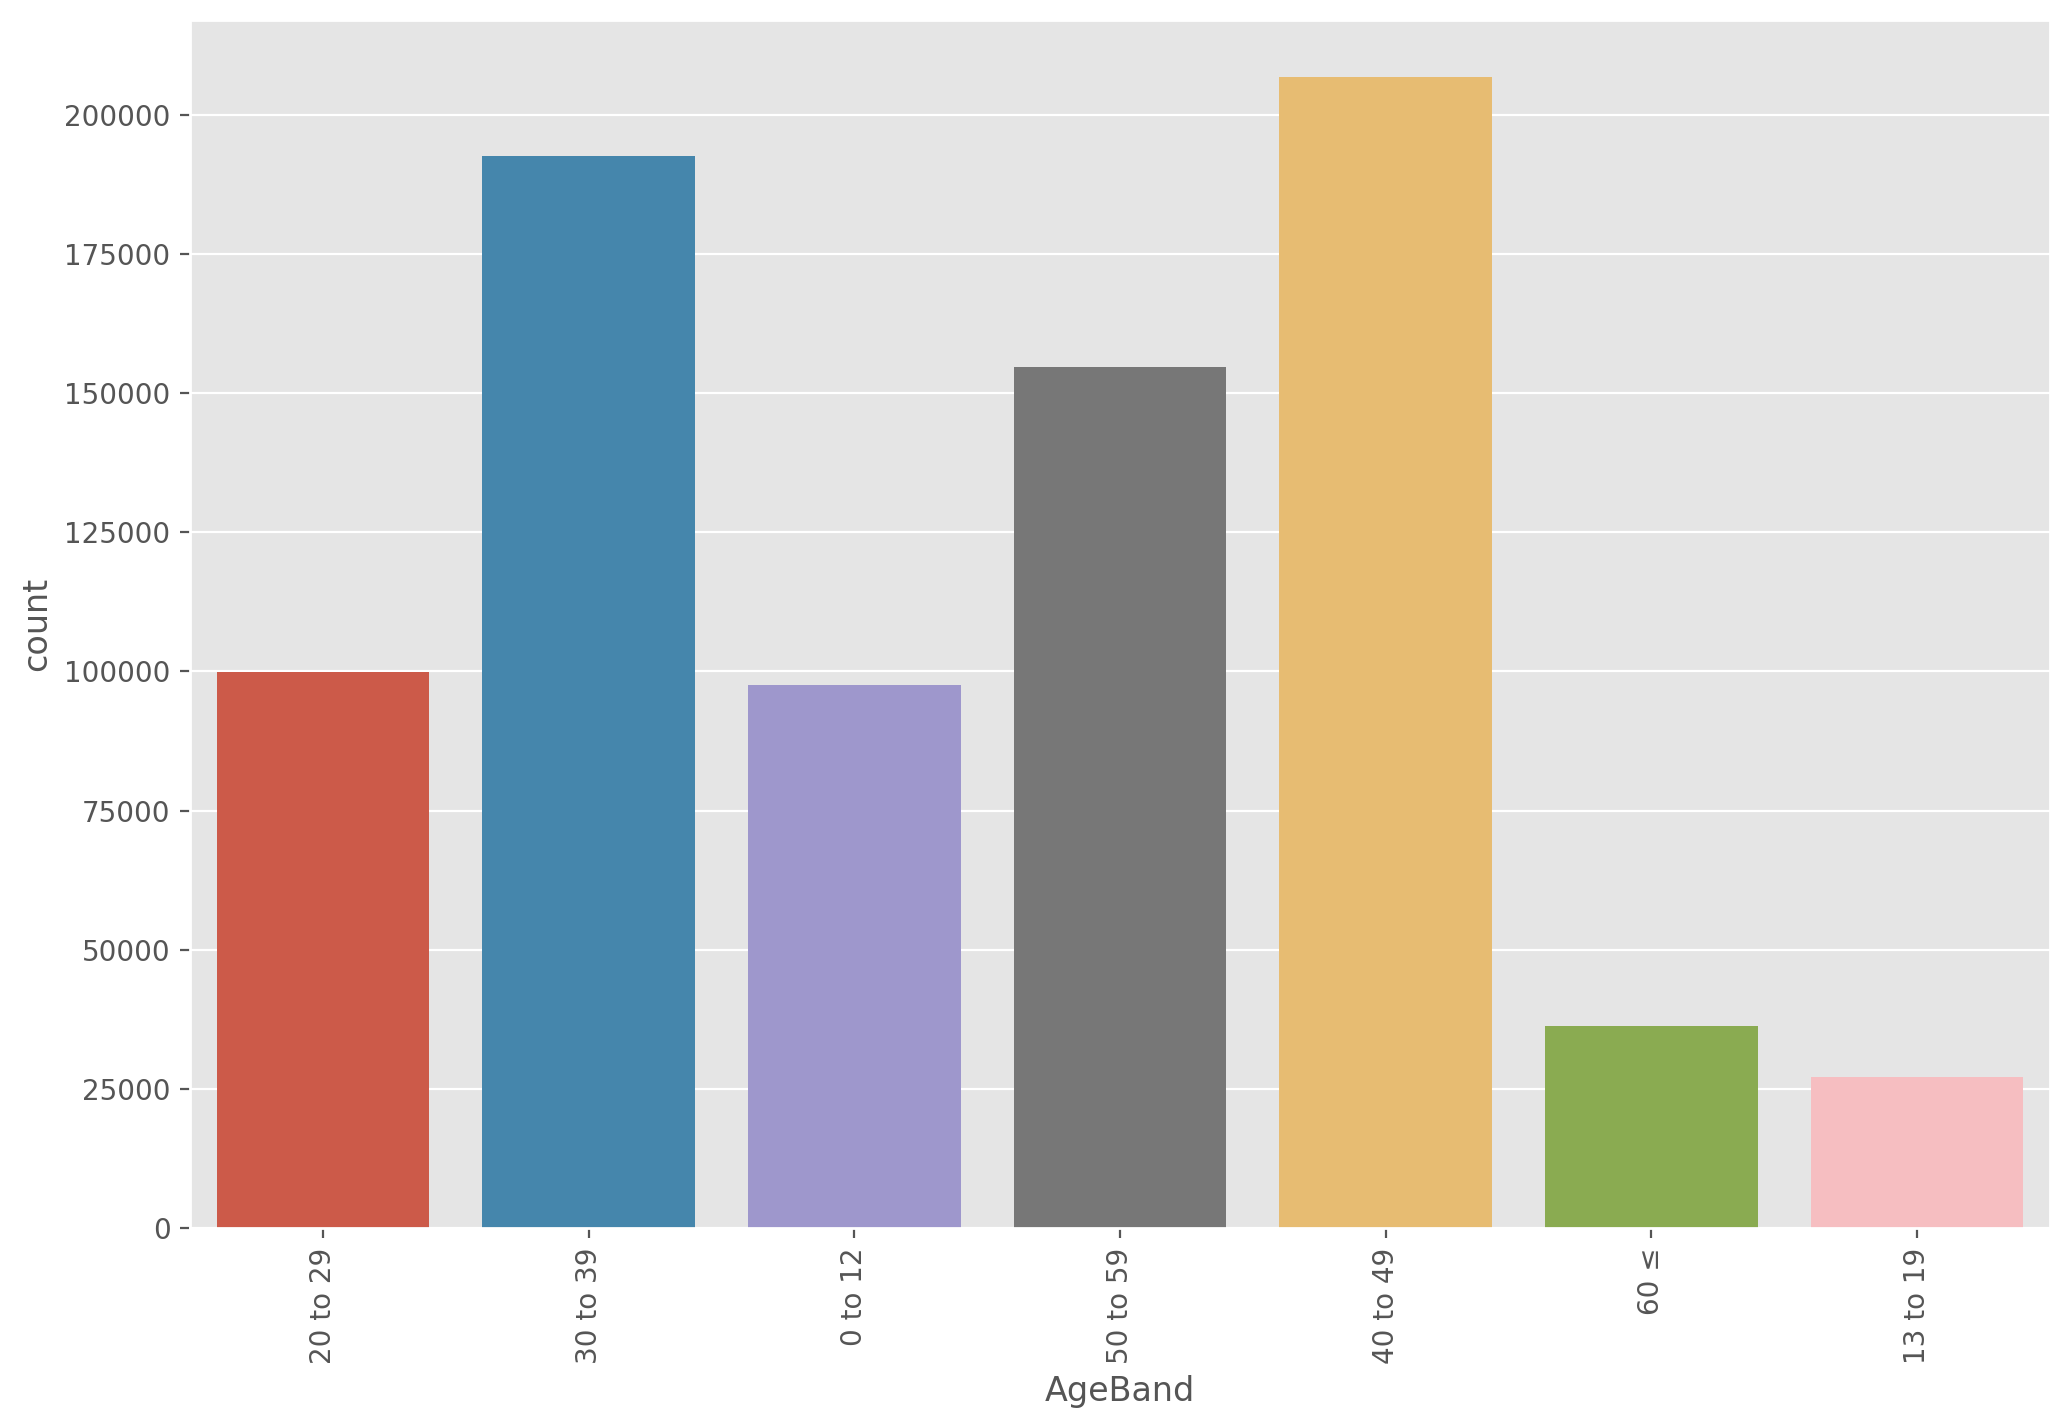

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
plt.xticks(rotation=90)
sns.countplot(data=df, x='AgeBand');

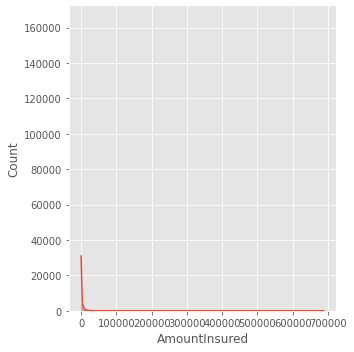

In [ ]:
sns.displot(data=df, x='AmountInsured', kde=True)

KeyError: ignored

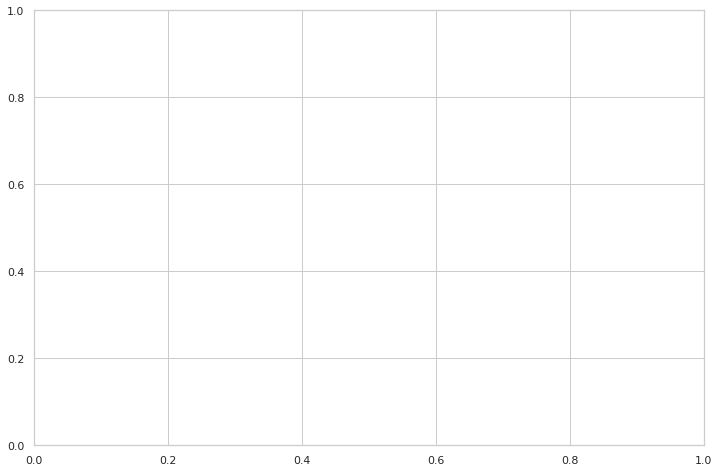

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

### Correlation Checking

In [ ]:
SpearmanCorr = df(method="spearman")
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(SpearmanCorr, vmax=.9, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f')

TypeError: ignored

In [ ]:
# Study of relationships between variables
###sns.pairplot(df) -- session crashed will happen

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: ignored

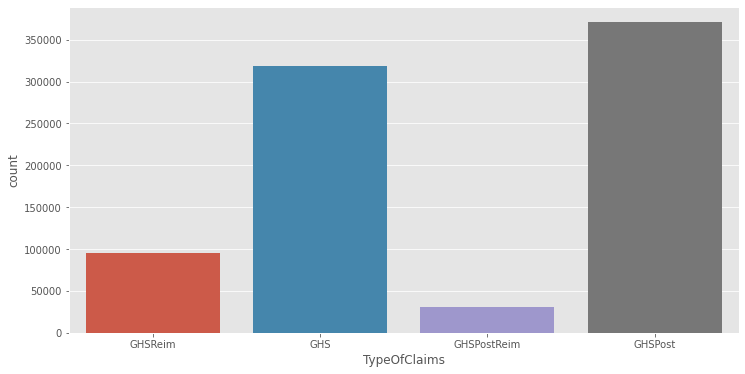

In [ ]:
sns.countplot(df['TypeOfClaims']).unique()

In [ ]:
df.corr()

,MCDays,AmountIncurred,AmountInsured,ExcessPaid,TotalVisit,Corporate
MCDays,1.000000,0.036514,0.042283,0.012250,-0.030275,-0.013306
AmountIncurred,0.036514,1.000000,0.709562,0.753638,0.326800,0.018063
AmountInsured,0.042283,0.709562,1.000000,0.071598,0.467276,0.025703
ExcessPaid,0.012250,0.753638,0.071598,1.000000,0.026716,0.001593
TotalVisit,-0.030275,0.326800,0.467276,0.026716,1.000000,0.173271
Corporate,-0.013306,0.018063,0.025703,0.001593,0.173271,1.000000


<AxesSubplot:>

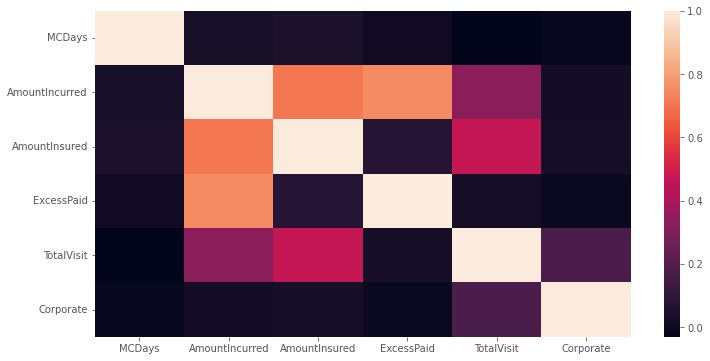

In [ ]:
sns.heatmap(df.corr())